# Task 1.5: Estimating the dimension of fractal objects in an image

In [3]:
import numpy as np
import scipy.misc as msc
import scipy.ndimage as img
import imageio
import matplotlib.pyplot as plt
import math

## Functions

In [4]:
# Converts to binary image
# Variables:-
#   f: image to be divided into square bins
# Returns:-
#   binary image
def foreground2BinImg(f):
    d = img.filters.gaussian_filter(f, sigma=0.50, mode='reflect') - \
    img.filters.gaussian_filter(f, sigma=1.00, mode='reflect')
    d = np.abs(d)
    m = d.max()
    d[d< 0.1*m] = 0
    d[d>=0.1*m] = 1
    
    return img.morphology.binary_closing(d)

In [5]:
# To display the square bins created
# Variables:-
#   squares: list of square bins
#   dim: dimention of each square
#   s: number of rows and columns for each bin
def plot_squares(squares, sq_dim, sq_num):
    fig=plt.figure(figsize=(sq_dim, sq_dim))
    columns = sq_num
    rows = sq_num
    for i, square in enumerate(squares):
        fig.add_subplot(rows, columns, (i+1))
        plt.imshow(square.T)
    plt.show()

In [6]:
# To divide an image into square bins
# Variables:-
#   img: image to be divided into square bins
#   s: The number of squares per side of the image (2 ** i where i is the index)
#   dim: dimention of image
#   make_plot: True if one want to display the square bins created
# Returns:-
#   list of square bins
def make_squares(img, s, dim, make_plot=False):
    squares = []
    verticals = np.hsplit(img, 1/s)
    for v in verticals:
        squares.append(np.vsplit(v,1/s))

    squares = np.array(squares)
    squares = squares.reshape(int((1/s)**2),int(dim * s),int(dim * s))
    
    if make_plot:
        plot_squares(squares, dim * s, 1/s)
    
    return squares

In [7]:
# To count squares with foreground pixels
# Variables:-
#   squares: list of square bins
# Returns:-
#   n: number of squares with foreground pixels
def count_fg_squares(squares):
    n = 0
    for square in squares:
        if True in square:
            n+=1

    return n

In [8]:
# To fit line to data.
# Variables:-
#   x: values along x-axis
#   y: values along y-axis
# Returns:-
#   slope of line
#   y-intercept
def fit_line(xs, ys):
    xs_b = np.vstack((np.ones(len(xs)),xs)) # x with bias
    ys = np.array(ys)
    
    w = np.dot(np.linalg.inv(np.dot(xs_b, xs_b.T)),np.dot(xs_b, ys))
    D = w[1]
    b = w[0]
    ys_pred = D * np.array(xs) + b
    
    plt.scatter(xs, ys, color="black")
    plt.plot(xs, ys_pred)
    plt.xlabel('log(1/s)')
    plt.ylabel('log(n)')
    
    return D, b

In [9]:
# Main function that utilises all functions above to display 
# the count of square bins for each index i = [1,2,...,L-2] where L = log of dimension of image base 2,
# the fitted line along log of forground square bins and log inverse of total square bins and
# the slope and y-intercept of the fitted line
# Variables:-
#   img: image
def estimate_fractal_dimension(img):
    dim = img.shape[0]
    L = int(math.log(dim,2))
    log_n = []
    log_inv_s = []

    print("Counting:")
    for i in range(L-2):
        s = 1/2**(i+1)
        log_inv_s.append(math.log(1/s, 10))

        squares = make_squares(img,s,dim)

        n = count_fg_squares(squares)
        log_n.append(math.log(n, 10))

        print("i = ", (i+1), " : ", n, "/", len(squares))
        
    D,b = fit_line(log_inv_s, log_n)
    
    print("\n")
    print("slope D = ", D)
    print("y-intercept b = ", b)
    
    return log_inv_s, log_n, D, b

## Demonstration of functions

### Reading image: lightning-3

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


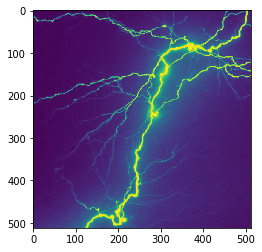

In [10]:
imgName = 'lightning-3'
f = msc.imread(imgName+'.png', flatten=True).astype(np.float)
plt.imshow(f)

### Displaying Binary Image

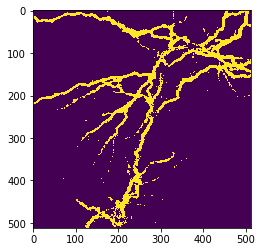

In [11]:
g = foreground2BinImg(f)
plt.imshow(g)

### Displaying square bins

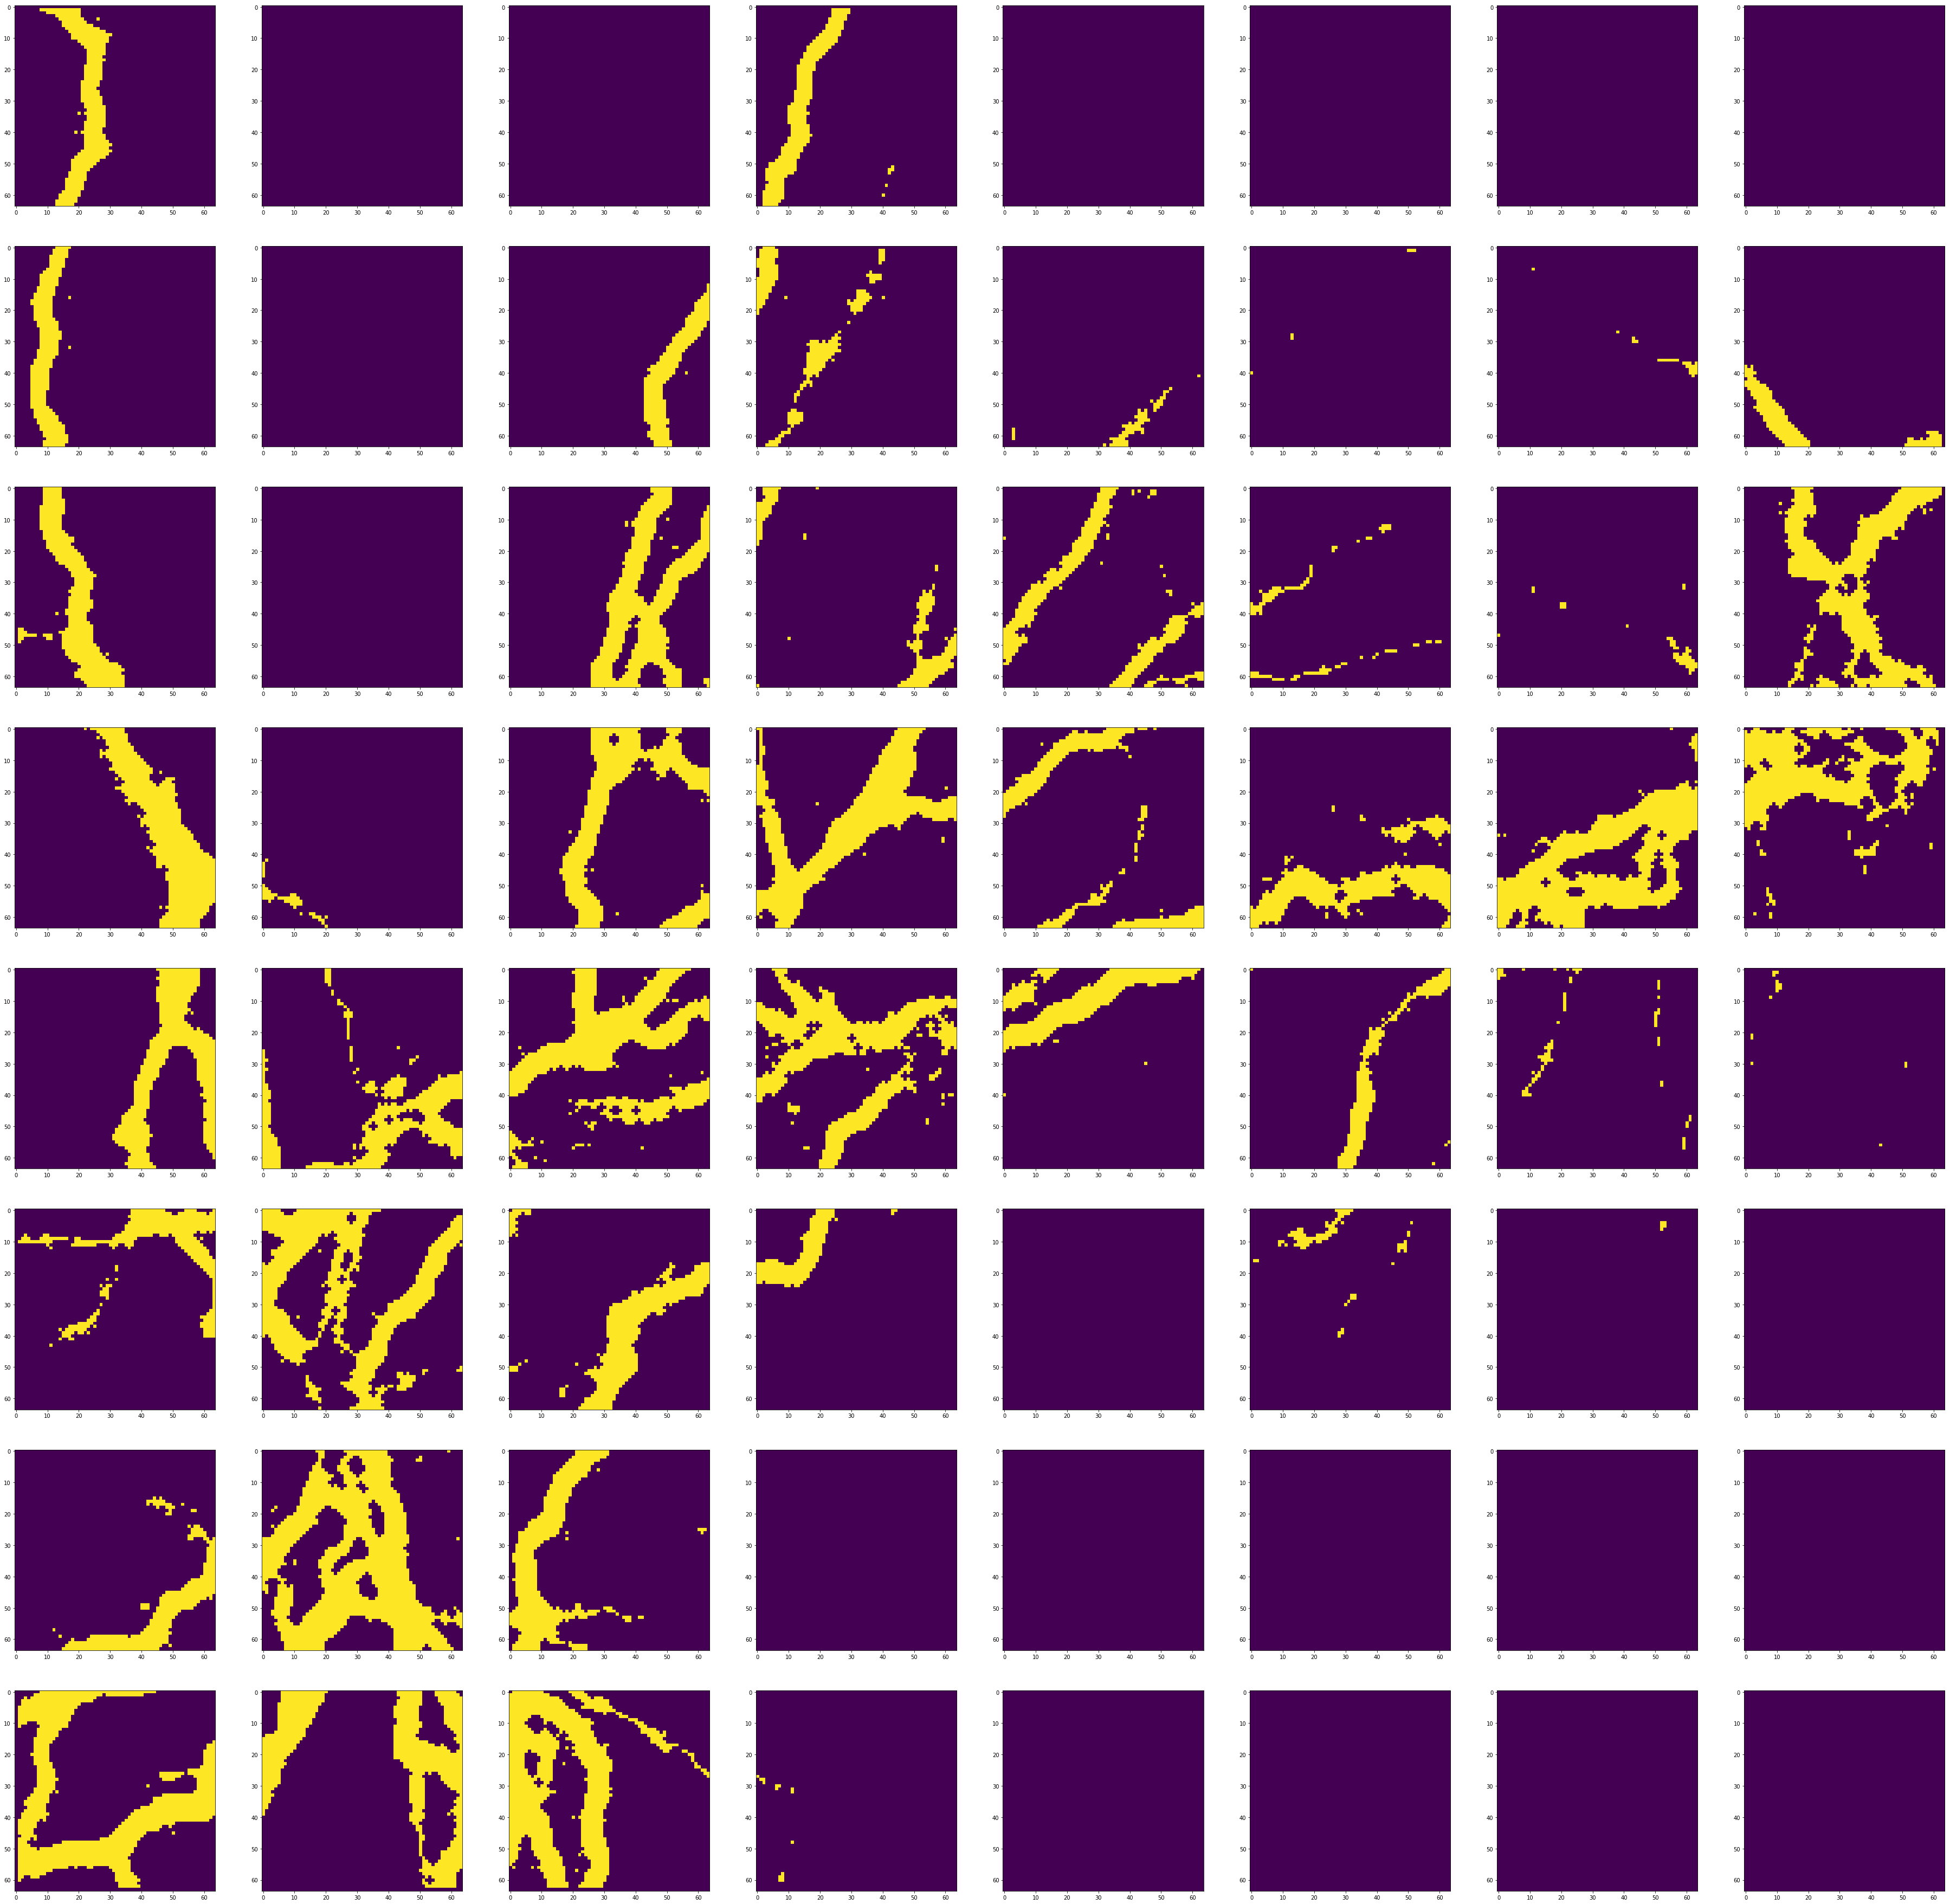

45 / 64


In [11]:
dim = g.shape[0]
i=3
s = 1/2**i
squares = make_squares(g,s,dim,make_plot=True)
print(count_fg_squares(squares),"/", len(squares))

### Estimating Fractal Dimensions for "lightning-3"

Counting:
i =  1  :  4 / 4
i =  2  :  14 / 16
i =  3  :  45 / 64
i =  4  :  147 / 256
i =  5  :  404 / 1024
i =  6  :  1064 / 4096
i =  7  :  2905 / 16384


slope D =  1.5776850270780338
y-intercept b =  0.19530464760481436


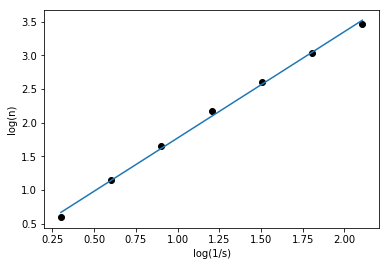

In [55]:
l3_log_inv_s, l3_log_n, l3_D, l3_b = estimate_fractal_dimension(g)

### Estimating Fractal Dimensions for "tree-2"

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


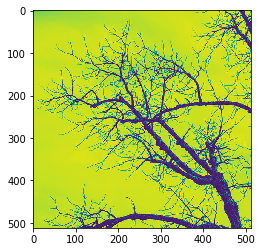

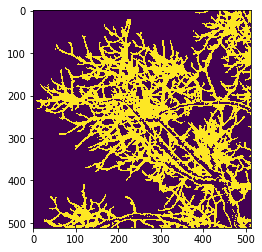

Counting:
i =  1  :  4 / 4
i =  2  :  16 / 16
i =  3  :  61 / 64
i =  4  :  218 / 256
i =  5  :  777 / 1024
i =  6  :  2679 / 4096
i =  7  :  8685 / 16384


slope D =  1.8463900565472438
y-intercept b =  0.08917195967590175


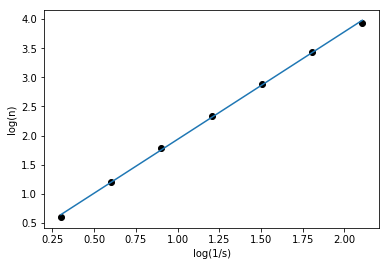

In [56]:
imgName = 'tree-2'
f = msc.imread(imgName+'.png', flatten=True).astype(np.float)
g = foreground2BinImg(f)

plt.imshow(f)
plt.show()
plt.imshow(g)
plt.show()
t2_log_inv_s, t2_log_n, t2_D, t2_b = estimate_fractal_dimension(g)

### Comparison

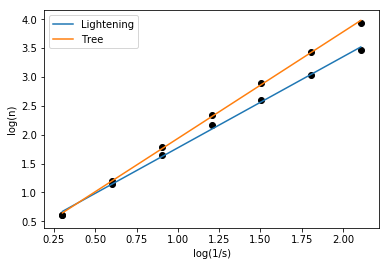

In [57]:
plt.scatter(l3_log_inv_s, l3_log_n, color="black")
plt.scatter(t2_log_inv_s, t2_log_n, color="black")
plt.plot(l3_log_inv_s, (l3_D * np.array(l3_log_inv_s) + l3_b), t2_log_inv_s, (t2_D * np.array(t2_log_inv_s) + t2_b))
plt.xlabel('log(1/s)')
plt.ylabel('log(n)')
plt.gca().legend(('Lightening','Tree'))

## Answers

<p>Fractal Dimensions obtained:</p>
<ul>
    <li>Lightning-3.png: 1.5776850270780338</li>
    <li>Tree-2: 1.8463900565472438</li>
</ul>
<p>Tree-2 has higher fractal dimension</p>